# method -Remove them  (CCA)

In [57]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('data_science_job.csv')

In [6]:
df.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              19158 non-null  int64  
 1   enrollee_id             19158 non-null  int64  
 2   city                    19158 non-null  object 
 3   city_development_index  18679 non-null  float64
 4   gender                  14650 non-null  object 
 5   relevent_experience     19158 non-null  object 
 6   enrolled_university     18772 non-null  object 
 7   education_level         18698 non-null  object 
 8   major_discipline        16345 non-null  object 
 9   experience              19093 non-null  float64
 10  company_size            13220 non-null  object 
 11  company_type            13018 non-null  object 
 12  training_hours          18392 non-null  float64
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [8]:
df.isna().sum() # total misiing values in each column

Unnamed: 0                   0
enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [11]:
(df.isna().mean()*100 ).sort_values()# percentage of missing value in each column

Unnamed: 0                 0.000000
enrollee_id                0.000000
city                       0.000000
relevent_experience        0.000000
target                     0.000000
experience                 0.339284
enrolled_university        2.014824
education_level            2.401086
city_development_index     2.500261
training_hours             3.998330
major_discipline          14.683161
gender                    23.530640
company_size              30.994885
company_type              32.049274
dtype: float64

we apply CCA on data set having missing values less than 5%

we cannot apply CCA on the below columns

1. company_size                 
2. company_type                 
3. gender                       
4. major_discipline             

 have more misiing values

we apply CCA on 
1. experience                
2. enrolled_university        
3. education_level           
4. city_development_index     
5. training_hours             

In [14]:
cols=[i for i in df.columns if df[i].isnull().mean()<0.05 and df[i].isnull().mean()>0]

In [17]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


##### these columns we are considering for CCA

where 
city_development_index ,experience  and training_hours are  numerical

enrolled_university and education_level are categorical


In [20]:
len (df[cols].dropna())/len(df)
# checking how much data will be left after droping nan from these columns

0.8968577095730244

In [21]:
new_df=df[cols].dropna()
df.shape ,new_df.shapepe

((19158, 14), (17182, 5))

#### visulizing the new data after droping nana

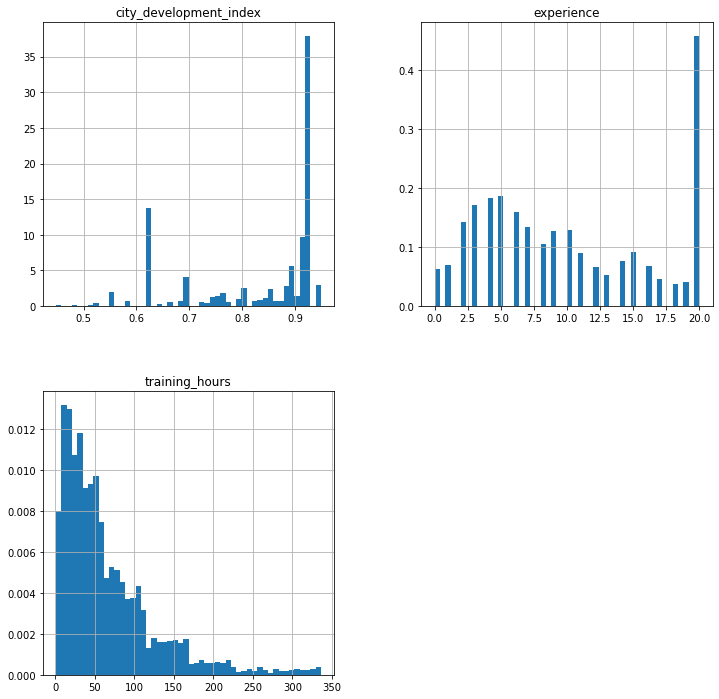

In [25]:
new_df.hist(bins=50,density=True,figsize=(12,12))
plt.show()

In [26]:
# univariate analysis 

In [27]:
# compare the distribution of data befor and after the removal of nan data (w.r.t numerical features)
# and  if the distribution similar  then it is ok to do cca

<AxesSubplot:>

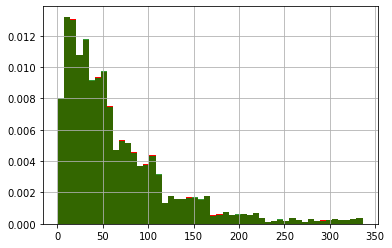

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

#### distribution of training_hours is same before and after the cca

In [33]:
# simillarly we are doing for other features

<AxesSubplot:>

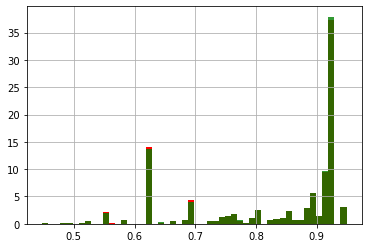

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

#### distribution of city_development_index is same before and after the cca

<AxesSubplot:>

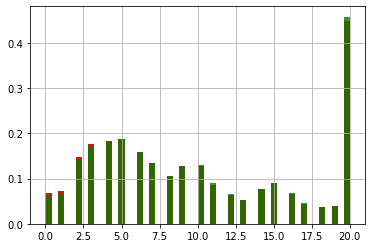

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

#### distribution of experience is same before and after the cca¶

In [41]:
# now w.r.t  categorical features  we have to check the ratio of the categories befor and after removing the nan values

In [54]:
pd.DataFrame([df["enrolled_university"].value_counts()/len(df) ,
new_df["enrolled_university"].value_counts()/len(new_df)], index= ["original","after cca"] )

,no_enrollment,Full time course,Part time course
original,0.721213,0.196106,0.062533
after cca,0.735188,0.200733,0.064079


#### ratio is similar so no need to worry for enrolled_university

In [55]:
pd.DataFrame([df["education_level"].value_counts()/len(df),
new_df["education_level"].value_counts()/len(new_df)],index= ["original","after cca"])

,Graduate,Masters,High School,Phd,Primary School
original,0.605387,0.227633,0.105282,0.021610,0.016077
after cca,0.619835,0.234082,0.107380,0.022116,0.016587


#### ratio is similar so no need to worry for education_level